# Project 4

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = '../assets/indeed-scraped-job-postings.csv'

In [962]:
df = pd.read_csv(data)

### Clean data

Drop NA

In [963]:
df.dropna(axis=0, inplace=True)

Remove columns salary and company

In [964]:
df.drop('salary', inplace=True, axis=1)
df.drop('company', inplace=True, axis=1)

Lowercase city, summary and title columns

In [965]:
df.city = df.city.str.lower()
df.summary = df.summary.str.lower()
df.title = df.title.str.lower()

Replace '+' with '-' in city column

In [966]:
df.city = df.city.str.replace('+','_')

Remove Punctuation

In [967]:
df.summary = df.summary.str.replace('[^\w\s]',' ')
df.title = df.title.str.replace('[^\w\s]',' ')

### EDA on salaries

In [880]:
df['parsed_salary'].describe()

count       406.000000
mean     107762.695813
std       48931.367632
min       10000.000000
25%       70000.000000
50%      100000.000000
75%      142164.500000
max      300000.000000
Name: parsed_salary, dtype: float64

### Create dummy column and series for High salary and low salary (Above 100K and below 100K)

In [968]:
df['salary_scale'] = np.where(df['parsed_salary']>=100000, 1, 0)

In [969]:
salary_scale = df.salary_scale

### Two dataframes for high pay jobs and low pay jobs

In [945]:
high_pay_titles = df[df['salary_scale'] >= 1]

In [946]:
low_pay_titles = df[df['salary_scale'] <= 0]

### Create dummy columns for cities

In [970]:
df_cities = pd.get_dummies(df['city']).astype(np.int64)

In [971]:
df_cities.head()

,atlanta,austin,boston,chicago,dallas,denver,houston,los_angeles,miami,new_york,palo_alto,philadelphia,phoenix,pittsburgh,portland,san_diego,san_francisco,seattle
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Discover unique titles for salary scale

In [949]:
high_pay_titles.head()

,city,summary,title,parsed_salary,salary_scale
9,denver,we are looking for a software engineer data sc...,software engineer data scientist,130000.0,1
14,denver,digitalglobe s geospatial big data gbd initi...,platform developer geospatial big data python,105000.0,1
16,denver,doing all this with an exceptional group of so...,devops engineer,170000.0,1
17,austin,what are we looking for in this data scientist...,data scientist programmer specialist,140000.0,1
18,austin,senior deep learning data scientist forecasti...,senior deep learning data scientist,150000.0,1


In [950]:
low_pay_titles.head()

,city,summary,title,parsed_salary,salary_scale
0,denver,would you like to join the more than 10 000 sc...,statistician gs 1350 12 deu perm ds,87792.0,0
1,denver,investigate potential uses of geospatial data ...,interdisciplinary cartographer geographer gs...,85127.5,0
2,denver,advise the data developer with regard to creat...,financial data scientist,75000.0,0
3,denver,portal managers on student outcome data report...,senior research analyst,68983.5,0
4,denver,experience entering and manipulating data in a...,animal care i,27000.0,0


#### Check for keywords in titles

In [951]:
df[(df['title'].str.contains(' r ')) & (df['salary_scale'] <= 1)][['title','salary_scale','summary']]

,title,salary_scale,summary
79,lead computer vision scientist ar vr r d ...,1,our client is a silicon valley startup that cr...
104,senior data scientist python r in des plaines,1,hadoop hive pig big data experience a non pro...
110,product development specialist food r d,0,uses sensory data in new product development e...
113,manager of data science python r,1,they need someone with the experience to be ha...
300,senior software scientist platform tools r d,1,senior software scientist platform tools r...


In [1160]:
df[(df['title'].str.contains('sql')) & df['salary_scale'] >= 1]['title']

394    data scientist   sql
Name: title, dtype: object

### Create columns for title values using function to make dummy variables

#### Create function to add title keywords as values to df

In [972]:
def add_title_col(string):
    if df['title'].str.contains(string).any():
        df[string] = np.where(df['title'].str.contains(string), 1, 0)

In [1047]:
add_title_col('senior')
add_title_col('data')
add_title_col('scientist')
add_title_col('engineer')
add_title_col('engineering')
add_title_col('python')
add_title_col(' r ')
add_title_col('geospatial')
add_title_col('machine learning')
add_title_col('developer')
add_title_col('software')
add_title_col('scala')
add_title_col('analyst')
add_title_col('quantitative')
add_title_col('statistical')
add_title_col('biotech')
add_title_col('energy')
add_title_col('stocks')
add_title_col('research')
add_title_col('big')
add_title_col('platform')
add_title_col('digital')
add_title_col('marketing')
add_title_col('media')
add_title_col('financial')
add_title_col('modeler')
add_title_col('manager')

#### Clean column names for copy paste needs

In [1161]:
col_names = df.columns
clean_col_names = [str(f) for f in col_names]

In [1162]:
clean_col_names

['city',
 'summary',
 'title',
 'parsed_salary',
 'salary_scale',
 'senior',
 'data',
 'scientist',
 'engineer',
 'engineering',
 'python',
 ' r ',
 'geospatial',
 'machine learning',
 'developer',
 'software',
 'scala',
 'analyst',
 'quantitative',
 'statistical',
 'biotech',
 'energy',
 'stocks',
 'research',
 'big',
 'platform',
 'digital',
 'marketing',
 'media',
 'financial',
 'modeler',
 'manager']

In [1048]:
df.head(2)

,city,summary,title,parsed_salary,salary_scale,senior,data,scientist,engineer,engineering,...,stocks,research,big,platform,digital,marketing,media,financial,modeler,manager
0,denver,would you like to join the more than 10 000 sc...,statistician gs 1350 12 deu perm ds,87792.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,denver,investigate potential uses of geospatial data ...,interdisciplinary cartographer geographer gs...,85127.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1049]:
df_titles = df[:]

In [1051]:
# df_titles.drop('company', inplace=True, axis=1)
# df_titles.drop('salary', inplace=True, axis=1)
df_titles.drop('summary', inplace=True, axis=1)
df_titles.drop('title', inplace=True, axis=1)
df_titles.drop('parsed_salary', inplace=True, axis=1)

/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1052]:
df_titles.head(2)

,city,salary_scale,senior,data,scientist,engineer,engineering,python,r,geospatial,...,stocks,research,big,platform,digital,marketing,media,financial,modeler,manager
0,denver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,denver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA 

In [1053]:
df_city_group = df.groupby(by=['city','salary_scale'], axis=0, as_index=False)
df_city_group = df_city_group.agg({  
                                     'senior': [np.sum,np.mean,np.std],
                                     'data': [np.sum,np.mean,np.std],
                                     'scientist': [np.sum,np.mean,np.std],
                                     'engineer': [np.sum,np.mean,np.std],
                                     'engineering': [np.sum,np.mean,np.std],
                                     'python': [np.sum,np.mean,np.std],
                                     ' r ': [np.sum,np.mean,np.std],
                                     'geospatial': [np.sum,np.mean,np.std],
                                     'machine learning': [np.sum,np.mean,np.std],
                                     'developer': [np.sum,np.mean,np.std],
                                     'software': [np.sum,np.mean,np.std],
                                     'scala': [np.sum,np.mean,np.std],
                                     'analyst': [np.sum,np.mean,np.std],
                                     'quantitative': [np.sum,np.mean,np.std],
                                     'statistical': [np.sum,np.mean,np.std],
                                     'biotech': [np.sum,np.mean,np.std],
                                     'energy': [np.sum,np.mean,np.std],
                                     'stocks': [np.sum,np.mean,np.std],
                                     'research': [np.sum,np.mean,np.std],
                                     'big': [np.sum,np.mean,np.std],
                                     'platform': [np.sum,np.mean,np.std],
                                     'digital': [np.sum,np.mean,np.std],
                                     'marketing': [np.sum,np.mean,np.std],
                                     'media': [np.sum,np.mean,np.std],
                                     'financial': [np.sum,np.mean,np.std],
                                     'modeler': [np.sum,np.mean,np.std],
                                     'manager': [np.sum,np.mean,np.std]
                                  })

In [906]:
#df_city_group.transpose()

In [1056]:
df_city_pivot = df.pivot_table(index=['city','salary_scale'], aggfunc=sum, margins=True, values=['senior','data','scientist','engineer','engineering','python',' r ','geospatial','machine learning','developer','software','scala','analyst','quantitative','statistical','biotech','energy','stocks','research','big','platform','digital','marketing','media','financial','modeler','manager'])
#df_city_pivot.columns = [''.join(col).strip() for col in df_city_pivot.columns.values]

In [1057]:
df_city_pivot.head()

r   analyst  big  biotech  data  developer  digital  \
city    salary_scale                                                         
atlanta 0             0.0      5.0  0.0      0.0   2.0        0.0      0.0   
        1             0.0      0.0  0.0      0.0   2.0        1.0      0.0   
austin  0             0.0      2.0  0.0      0.0   0.0        0.0      0.0   
        1             0.0      0.0  0.0      0.0   3.0        0.0      0.0   
boston  0             0.0      6.0  0.0      0.0   5.0        0.0      0.0   

                      energy  engineer  engineering   ...    platform  python  \
city    salary_scale                                  ...                       
atlanta 0                0.0       1.0          0.0   ...         0.0     0.0   
        1                0.0       0.0          0.0   ...         0.0     0.0   
austin  0                0.0       1.0          0.0   ...         0.0     0.0   
        1                0.0       0.0          0.0   ...         0.0     0.0   
boston  0                0.0       0.0          0.0   ...         0.0     0.0   

                      quantitative  research  scala  scientist  senior  \
city    salary_scale                                                     
atlanta 0                      0.0       7.0    0.0        2.0     0.0   
        1                      0.0       0.0    0.0        2.0     0.0   
austin  0                      0.0       2.0    0.0        0.0     0.0   
        1                      0.0       0.0    0.0        3.0     1.0   
boston  0                      0.0       4.0    0.0        3.0     3.0   

                      software  statistical  stocks  
city    salary_scale                                 
atlanta 0                  0.0          1.0     0.0  
        1                  0.0          1.0     0.0  
austin  0                  1.0          0.0     0.0  
        1                  0.0          0.0     0.0  
boston  0                  0.0          0.0     0.0  

[5 rows x 27 columns]

# Merge both df (cities, keywords, salary_scale)

In [1064]:
df_group = pd.merge(left=df, right=df_cities, left_index=True, right_index=True, how='left' )

In [1065]:
df_group.drop('city', inplace=True, axis=1)
df_group.drop('summary', inplace=True, axis=1)
df_group.drop('title', inplace=True, axis=1)
df_group.drop('parsed_salary', inplace=True, axis=1)

In [1066]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 412
Data columns (total 46 columns):
salary_scale        406 non-null int64
senior              406 non-null int64
data                406 non-null int64
scientist           406 non-null int64
engineer            406 non-null int64
engineering         406 non-null int64
python              406 non-null int64
 r                  406 non-null int64
geospatial          406 non-null int64
machine learning    406 non-null int64
developer           406 non-null int64
software            406 non-null int64
scala               406 non-null int64
analyst             406 non-null int64
quantitative        406 non-null int64
statistical         406 non-null int64
biotech             406 non-null int64
energy              406 non-null int64
stocks              406 non-null int64
research            406 non-null int64
big                 406 non-null int64
platform            406 non-null int64
digital             406 non-null int6

In [1067]:
salary_group = df_group.groupby(by='salary_scale', as_index=False)
salary_group = salary_group.agg({    'senior': [np.sum,np.mean,np.corrcoef],
                                     'data': [np.sum,np.mean,np.corrcoef],
                                     'scientist': [np.sum,np.mean,np.corrcoef],
                                     'engineer': [np.sum,np.mean,np.corrcoef],
                                     'engineering': [np.sum,np.mean,np.corrcoef],
                                     'python': [np.sum,np.mean,np.corrcoef],
                                     ' r ': [np.sum,np.mean,np.corrcoef],
                                     'geospatial': [np.sum,np.mean,np.corrcoef],
                                     'machine learning': [np.sum,np.mean,np.corrcoef],
                                     'developer': [np.sum,np.mean,np.corrcoef],
                                     'software': [np.sum,np.mean,np.corrcoef],
                                     'scala': [np.sum,np.mean,np.corrcoef],
                                     'analyst': [np.sum,np.mean,np.corrcoef],
                                     'quantitative': [np.sum,np.mean,np.corrcoef],
                                     'statistical': [np.sum,np.mean,np.corrcoef],
                                     'biotech': [np.sum,np.mean,np.corrcoef],
                                     'energy': [np.sum,np.mean,np.corrcoef],
                                     'stocks': [np.sum,np.mean,np.corrcoef],
                                     'research': [np.sum,np.mean,np.corrcoef],
                                     'big': [np.sum,np.mean,np.corrcoef],
                                     'platform': [np.sum,np.mean,np.corrcoef],
                                     'digital': [np.sum,np.mean,np.corrcoef],
                                     'marketing': [np.sum,np.mean,np.corrcoef],
                                     'media': [np.sum,np.mean,np.corrcoef],
                                     'financial': [np.sum,np.mean,np.corrcoef],
                                     'modeler': [np.sum,np.mean,np.corrcoef],
                                     'manager': [np.sum,np.mean,np.corrcoef],
                                  })

In [1068]:
salary_group.shape

(2, 82)

In [1069]:
salary_group.transpose()

0           1
salary_scale                0.000000    1.000000
biotech          sum        0.000000    1.000000
                 mean       0.000000    0.004785
                 corrcoef        NaN    1.000000
financial        sum        3.000000    2.000000
                 mean       0.015228    0.009569
                 corrcoef   1.000000    1.000000
energy           sum        0.000000    1.000000
                 mean       0.000000    0.004785
                 corrcoef        NaN    1.000000
engineering      sum        1.000000    4.000000
                 mean       0.005076    0.019139
                 corrcoef   1.000000    1.000000
scientist        sum       36.000000  116.000000
                 mean       0.182741    0.555024
                 corrcoef   1.000000    1.000000
 r               sum        1.000000    4.000000
                 mean       0.005076    0.019139
                 corrcoef   1.000000    1.000000
statistical      sum        8.000000    5.000000
                 mean       0.040609    0.023923
                 corrcoef   1.000000    1.000000
developer        sum        1.000000   10.000000
                 mean       0.005076    0.047847
                 corrcoef   1.000000    1.000000
scala            sum        0.000000    1.000000
                 mean       0.000000    0.004785
                 corrcoef        NaN    1.000000
media            sum        0.000000    1.000000
                 mean       0.000000    0.004785
...                              ...         ...
stocks           sum        0.000000    1.000000
                 mean       0.000000    0.004785
                 corrcoef        NaN    1.000000
data             sum       40.000000  121.000000
                 mean       0.203046    0.578947
                 corrcoef   1.000000    1.000000
analyst          sum       63.000000   22.000000
                 mean       0.319797    0.105263
                 corrcoef   1.000000    1.000000
manager          sum       15.000000   10.000000
                 mean       0.076142    0.047847
                 corrcoef   1.000000    1.000000
machine learning sum        7.000000   18.000000
                 mean       0.035533    0.086124
                 corrcoef   1.000000    1.000000
geospatial       sum        0.000000    1.000000
                 mean       0.000000    0.004785
                 corrcoef        NaN    1.000000
quantitative     sum        1.000000   14.000000
                 mean       0.005076    0.066986
                 corrcoef   1.000000    1.000000
senior           sum       16.000000   42.000000
                 mean       0.081218    0.200957
                 corrcoef   1.000000    1.000000
modeler          sum        1.000000    2.000000
                 mean       0.005076    0.009569
                 corrcoef   1.000000    1.000000
software         sum        7.000000   13.000000
                 mean       0.035533    0.062201
                 corrcoef   1.000000    1.000000

[82 rows x 2 columns]

## Create two dataframes for cities and title features

In [404]:
# String dataframe for cities
df_city = df.city

In [852]:
df_cities.head(2)

,atlanta,austin,boston,chicago,dallas,denver,houston,los_angeles,miami,new_york,palo_alto,philadelphia,phoenix,pittsburgh,portland,san_diego,san_francisco,seattle
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [988]:
df_titles.head(2)

,city,salary_scale,senior,data,scientist,engineer,engineering,python,r,geospatial,...,energy,stocks,research,big,platform,digital,marketing,media,financial,modeler
0,denver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,denver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [927]:
salary_scale = pd.DataFrame(salary_scale)

In [928]:
df_cities_salary = pd.merge(left=salary_scale, right=df_cities, left_index=True, right_index=True, how='left' )

In [994]:
df_cities_salary.head(2)

,salary_scale,atlanta,austin,boston,chicago,dallas,denver,houston,los_angeles,miami,new_york,palo_alto,philadelphia,phoenix,pittsburgh,portland,san_diego,san_francisco,seattle
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1070]:
df_titles_salary = df_titles[:]

In [1072]:
df_titles_salary.drop('city', inplace=True, axis=1)

In [1073]:
df_titles_salary.head(2)

,salary_scale,senior,data,scientist,engineer,engineering,python,r,geospatial,machine learning,...,stocks,research,big,platform,digital,marketing,media,financial,modeler,manager
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Predicting salaries using Logistic Regression

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [1035]:
import statsmodels.formula.api as sm

model = sm.logit("salary_scale ~ city", data=df).fit()
model.summary()

         Current function value: 0.583198
         Iterations: 35


/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           salary_scale   No. Observations:                  406
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                           17
Date:                Mon, 16 Jan 2017   Pseudo R-squ.:                  0.1581
Time:                        11:30:22   Log-Likelihood:                -236.78
converged:                      False   LL-Null:                       -281.24
                                        LLR p-value:                 9.573e-12
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                -1.0296      0.521     -1.976      0.048        -2.051    -0.009
city[T.austin]            0.7419      0.925      0.802      0.422        -1.070     2.554
city[T.boston]            1.9910      0.615      3.239      0.001         0.786     3.196
city[T.chicago]           1.2660      0.625      2.025      0.043         0.041     2.491
city[T.dallas]            0.6931      0.784      0.884      0.376        -0.843     2.229
city[T.denver]           -0.5108      0.822     -0.621      0.534        -2.123     1.101
city[T.houston]         -12.9611    363.855     -0.036      0.972      -726.103   700.181
city[T.los_angeles]       1.1166      0.668      1.673      0.094        -0.192     2.425
city[T.miami]             0.3365      1.011      0.333      0.739        -1.644     2.317
city[T.new_york]          0.8329      0.558      1.493      0.135        -0.260     1.926
city[T.palo_alto]         2.0794      0.681      3.052      0.002         0.744     3.415
city[T.philadelphia]      1.5892      0.815      1.950      0.051        -0.008     3.187
city[T.phoenix]         -23.4222   8.33e+04     -0.000      1.000     -1.63e+05  1.63e+05
city[T.pittsburgh]      -12.9611    363.855     -0.036      0.972      -726.103   700.181
city[T.portland]        -17.5078   1.06e+04     -0.002      0.999     -2.08e+04  2.08e+04
city[T.san_diego]         0.6242      0.830      0.752      0.452        -1.002     2.250
city[T.san_francisco]     2.6137      0.650      4.023      0.000         1.340     3.887
city[T.seattle]           1.1350      0.695      1.634      0.102        -0.227     2.496
=========================================================================================
"""

### The coeffients show a wide range of salary per city. Specifically Phoenix (-23.42) against San Francisco (2.61). 

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [1206]:
import statsmodels.formula.api as sm

model = sm.logit("salary_scale ~ senior", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.677576
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           salary_scale   No. Observations:                  406
Model:                          Logit   Df Residuals:                      404
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Jan 2017   Pseudo R-squ.:                 0.02185
Time:                        13:14:12   Log-Likelihood:                -275.10
converged:                       True   LL-Null:                       -281.24
                                        LLR p-value:                 0.0004555
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0805      0.107     -0.750      0.453        -0.291     0.130
senior         1.0456      0.313      3.343      0.001         0.433     1.659
==============================================================================
"""

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [1081]:
df_group.head(2)

,salary_scale,senior,data,scientist,engineer,engineering,python,r,geospatial,machine learning,...,miami,new_york,palo_alto,philadelphia,phoenix,pittsburgh,portland,san_diego,san_francisco,seattle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1111]:
# Using two X datasets 
X = df_group.ix[:,1:]
#X = df_titles_salary.ix[:,1:]
y = df_group['salary_scale']

In [1083]:
#X = st.add_constant(X, prepend = False)

In [1084]:
# Create an array if needed
#y = y.values

In [1145]:
y.shape

(406,)

In [1144]:
X.shape

(406, 45)

#### Thought experiment: What is the baseline accuracy for this model?

In [1159]:
print 'Baseline accuracy'
print 1. - np.mean(y)

Baseline accuracy
0.485221674877


In [1114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17, weights='distance')

In [1115]:
from sklearn.model_selection import cross_val_score
# from sklearn.cross_validation import cross_val_score

scores = cross_val_score(knn, X, y, cv=10)
print scores
print np.mean(scores)

[ 0.7804878   0.80487805  0.7804878   0.73170732  0.73170732  0.73170732
  0.65853659  0.5         0.9         0.74358974]
0.736310193871


In [1117]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='distance')

In [1132]:
knn.score(X, y)

0.91871921182266014

In [1198]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, predicted)

array([[180,  17],
       [ 16, 193]])

In [1199]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1)

In [1200]:
lr.fit(X, y)
print('INITIAL MODEL ACCURACY (No cross validation: ' , lr.score(X,y))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)

print('CV 5 Fold Scores', scores)
print('CV 5 Fold Mean accuracy', scores.mean())
print('CV 5 Fold STD of accuracy', scores.std())

('INITIAL MODEL ACCURACY (No cross validation: ', 0.83497536945812811)
('CV 5 Fold Scores', array([ 0.82926829,  0.7804878 ,  0.7654321 ,  0.66666667,  0.8625    ]))
('CV 5 Fold Mean accuracy', 0.78087097259861482)
('CV 5 Fold STD of accuracy', 0.066763354981571266)


In [1088]:
# DIVIDE DATASET INTO SEPARATE TRAINING DATASET - TEST SIZE SET TO 0.33 - TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr.fit(X_train, y_train)

# print lr.score(X_test, y_test)
# MAKE A PREDICTION ON THE TEST SET AS DIRECTED
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

# COMPARE THE PREDICTIONS TO THE ANSWERS TO DETERMINE THE CLASSIFICATION REPORT
print('Total Misclassified Samples (sum off-diagonals): %d' % (y_test != y_pred).sum())
## CREATE confmat variable being careful of the order of y_true and y_pred
##

Accuracy: 0.7647
[[38 12]
 [12 40]]
Total Misclassified Samples (sum off-diagonals): 24


Confusion Matrix for Type I and Type II Error


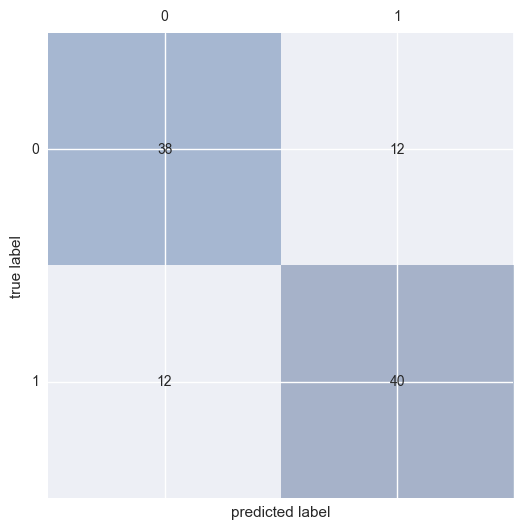

Classification Report: 
                precision    recall  f1-score   support

    Under 100K       0.76      0.76      0.76        50
100K and above       0.77      0.77      0.77        52

   avg / total       0.76      0.76      0.76       102



In [1040]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
print('Confusion Matrix for Type I and Type II Error')
plt.show()

from sklearn.metrics import classification_report
target_names = ['Under 100K', '100K and above']
y_true = y_test
print('Classification Report: ')
print(classification_report(y_true, y_pred, target_names=target_names))

In [1089]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([ ('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1)), ])

pipe_lr.fit(X_train, y_train)

print('Scaled/Standardized Improved Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Scaled/Standardized Improved Test Accuracy: 0.7549


In [1090]:
pipe_lr

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [1091]:
from sklearn.model_selection import GridSearchCV

In [1092]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]

pipe_grid_search = GridSearchCV(pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

pipe_grid_search = pipe_grid_search.fit(X_train, y_train)


print('Grid Search Best Score: %.4f' % pipe_grid_search.best_score_)
print('Grid Search Best Parameter for C: ')
print pipe_grid_search.best_params_

Grid Search Best Score: 0.7862
Grid Search Best Parameter for C: 
{'clf__C': 0.01}


In [1093]:
from sklearn.model_selection import validation_curve

In [1032]:
# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(10,10)

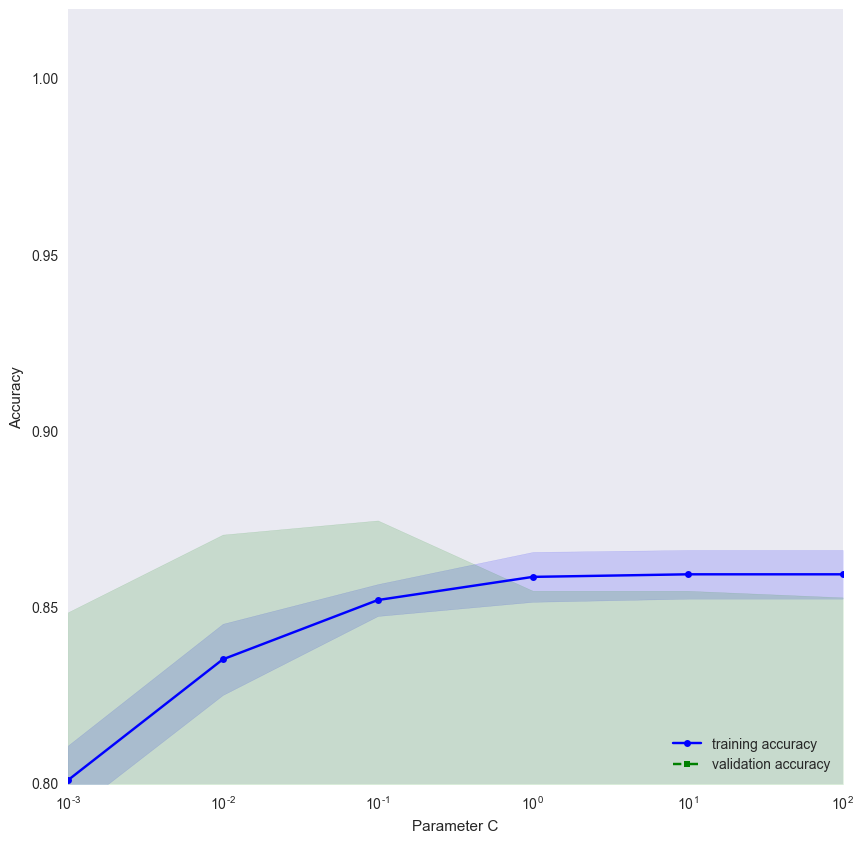

NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV


In [1094]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C', 
                                             param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.02])
plt.show()
print('NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV')

In [1095]:
from sklearn import metrics

NOTE:  This plot confirms the above-mentioned Classification Report with its excellent results.


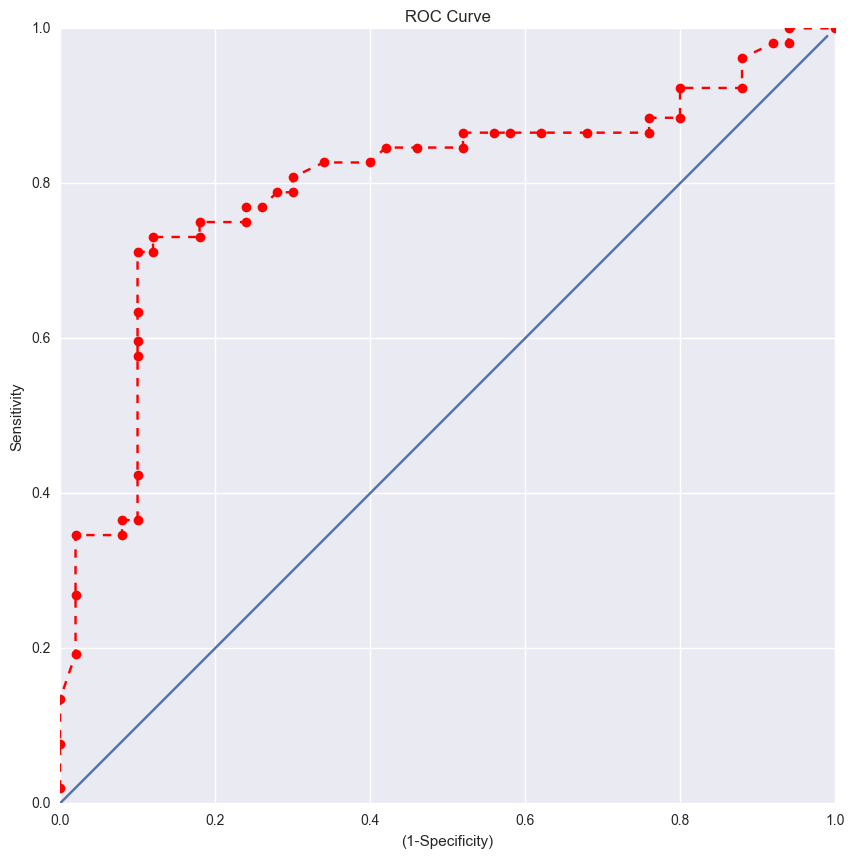

In [1096]:
prob = lr.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(y_test, prob)
plt.plot(fpr,sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
print('NOTE:  This plot confirms the above-mentioned Classification Report with its excellent results.')